# Life Span Analysis
Explore effect of ecological and constituional factors on life span.

sleep hours: ['slowWaveSleep', 'dreamSleep', 'sleep']

weights: ['body', 'brain']

gestation days: ['gestation']

danger levels: ['predation', 'sleepExposure', 'danger']


### Summary:
size ['body', 'brain', 'gestation'] and sleep factors ['slowWaveSleep', 'dreamSleep', 'sleep'] may relate more to life span
    

In [2]:
# from loaddata import load_data
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt # to show images
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import io
import requests
import numpy as np

from sklearn.decomposition import PCA # for PCA calculation

### Data ploting and analysis

csv file size:  (42, 11)


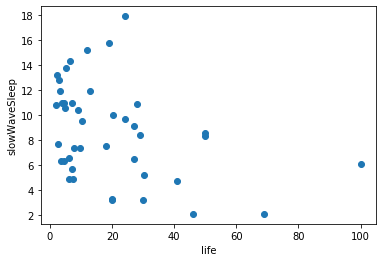

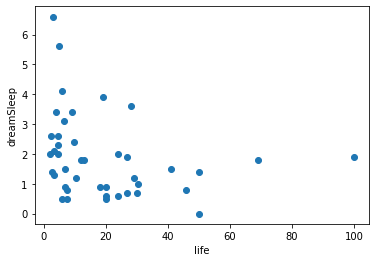

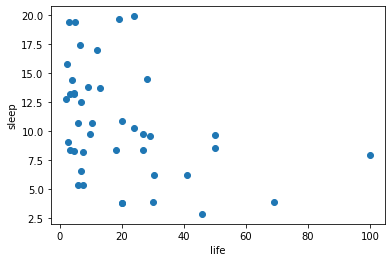

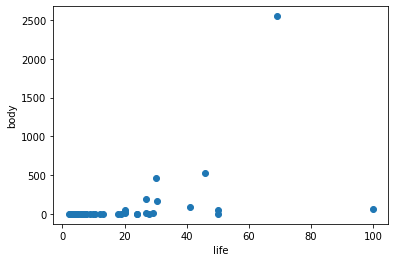

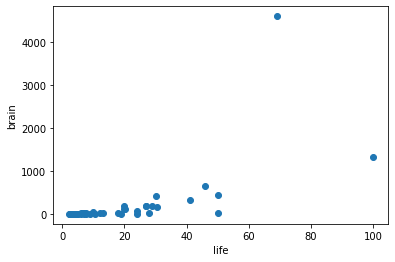

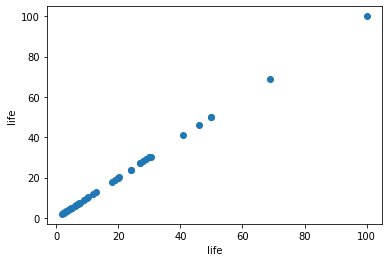

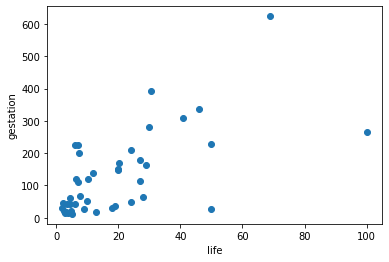

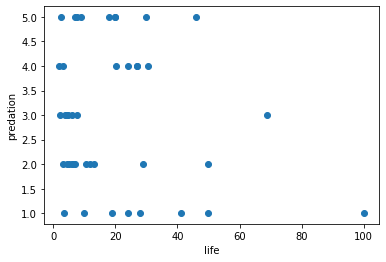

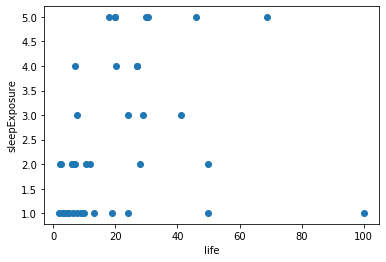

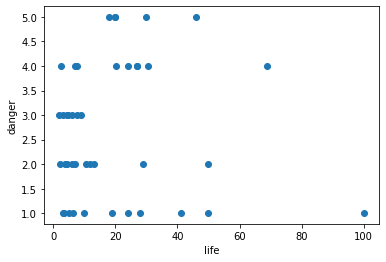

In [7]:
### load data ###
path="./data/sleep_original.csv"
fill_nan=-999.00
filter_nan=False
filter_list=[]
    
# load data
csv_file = pd.read_csv(path)

if len(filter_list) == 0:
    filter_list = np.array(csv_file.columns)
idx = []
for x in filter_list:
    if len(idx) == 0:
        idx = csv_file[x].isna()
    else:
        idx = idx + (csv_file[x].isna())
idx = list(map(lambda x: not x, idx))
csv_file = csv_file[idx]
print("csv file size: ", csv_file.shape)

for i in range(1, csv_file.shape[1]):
    pyplot.scatter(csv_file[csv_file.columns[6]], csv_file[csv_file.columns[i]])
    pyplot.xlabel(csv_file.columns[6])
    pyplot.ylabel(csv_file.columns[i])
    pyplot.show()

comments:

    slowWaveSleep, dreamSleep, sleep are negative correlated to life span.
    
    body, brain, gestiation are positive correlated to life span.
    
    predation, sleepExposure, danger are unknown correlated to life span.

### Feature Scaling
ref: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler


In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
def std_scaler(X):
    scaler = StandardScaler().fit(X)
    return scaler.transform(X)

### Load Data

In [30]:
### load data ###
def load_data(path="./data/sleep_original.csv", fill_nan=-999.00, keep_attr=['life', 'predation', 'sleepExposure', 'danger'], filter_nan=False, filter_list=[]):
    '''
        path: local directory of original data file
        fill_nan: replace NaN with specified number
        filter_nan: filter out data with NaN values
    '''
    
    # load data
    path = "./data/sleep_original.csv"
    if os.path.isfile(path):
        csv_file = pd.read_csv(path, usecols = keep_attr)
    else:
        url = "https://yao-lab.github.io/data/sleep1.csv" # Load original data
        src = requests.get(url).content
        csv_file = pd.read_csv(io.StringIO(src.decode('utf-8')), usecols = keep_attr)
    
    if filter_nan:
        if len(filter_list) == 0:
            filter_list = np.array(csv_file.columns)
        idx = []
        for x in filter_list:
            if len(idx) == 0:
                idx = csv_file[x].isna()
            else:
                idx = idx + (csv_file[x].isna())
        idx = list(map(lambda x: not x, idx))
        csv_file = csv_file[idx]
    else:
        csv_file = csv_file.fillna(fill_nan) # Replace NaN with -999.00 (regarded as infinitely negative)
    print("csv file size: ", csv_file.shape)
    
    # Extra data with attributes (dimensions), specials, and numeric data
    csv_file = csv_file[keep_attr]
    data = np.array(csv_file)[:, 1:]
    attrs = np.array(csv_file.columns[1:])
    species = np.array(csv_file)[:, 0]

    print("%d Attributes: " %len(attrs))
    print(attrs)
    print("%d Species: " %len(species))
    print(species)
    print("Data shape: ", data.shape) #get data size
#     print(data[:5])
    print()
    
    data = std_scaler(data)
    return attrs, species, data

# PCA

In [31]:
def _PCA(attris, species, data, n_components=2):
    p = len(attrs)
    n = len(data)

    # mean value
    mu = np.mean(data, axis=0);
#     print("mean: ", mu)

    # get PCA
    pca = PCA(n_components=n_components, svd_solver='arpack')
    pca.fit(data)
    print("explained_variance_ratio: ", pca.explained_variance_ratio_) 
#     print(pca.singular_values_.shape)

    # Plot PCA chart
    plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.show()
    
    # Show top 3 components
    Y = pca.components_;
    print(Y.shape) # number of components
#     print(Y)
    X_reduction = pca.transform(data)
    
    return X_reduction, pca

## 1. Danger Factors vs Lifetime

Factors/ Features: ['predation' 'sleepExposure' 'danger']
 
Annotation: 'life'

csv file size:  (58, 4)
3 Attributes: 
['predation' 'sleepExposure' 'danger']
58 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  34.    7.   28.   20.    3.9  39.3  41.   16.2
   9.    7.6  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5
  23.6  12.   20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.
  17.   20.   12.7   3.5   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (58, 3)



C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


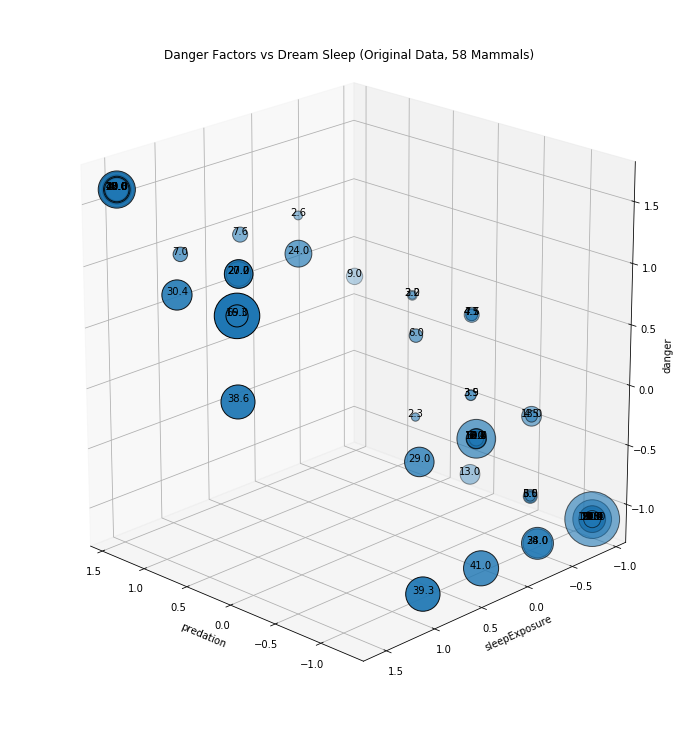

In [32]:
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'predation', 'sleepExposure', 'danger'])

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i],
              horizontalalignment='center')
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], s=filtered_species.astype(np.float)*30,
           edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
ax.set_title('Danger Factors vs Dream Sleep (Original Data, 58 Mammals)')
ax.set_xlabel('predation')
ax.set_ylabel('sleepExposure')
ax.set_zlabel('danger')

plt.show()

csv file size:  (58, 4)
3 Attributes: 
['predation' 'sleepExposure' 'danger']
58 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  34.    7.   28.   20.    3.9  39.3  41.   16.2
   9.    7.6  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5
  23.6  12.   20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.
  17.   20.   12.7   3.5   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (58, 3)

explained_variance_ratio:  [0.85993418 0.12623232]


C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


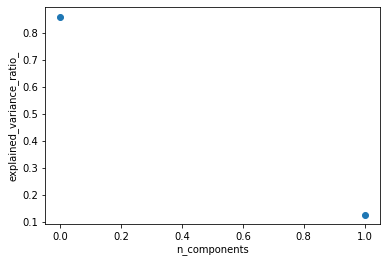

(2, 3)


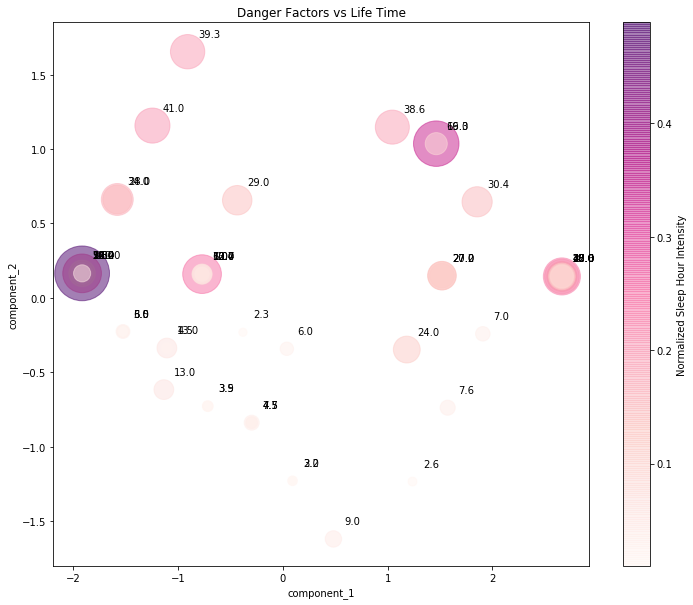

In [45]:
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'predation', 'sleepExposure', 'danger'])

X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(12,10))

total_w = filtered_species.astype(np.float)
color = total_w / np.linalg.norm(total_w)

plt.scatter(X_filter[:, 0], X_filter[:, 1], alpha=0.5,  s=filtered_species.astype(float)*30,  c=color, cmap='RdPu')
cbar = plt.colorbar()
cbar.set_label('Normalized Sleep Hour Intensity')

for i in range(len(filtered_species_ds)):
    plt.annotate(filtered_species[i], (X_filter[i, 0]+0.1, X_filter[i, 1]+0.1))
    
plt.title('Danger Factors vs Life Time')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

comment: danger factors relate to life, but PCA do not perform best?

## 2. Size Factors vs Life

dimensions: ['body', 'brain', 'gestation']
 
Annotation: 'life'

csv file size:  (55, 4)
3 Attributes: 
['body' 'brain' 'gestation']
55 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  28.   20.    3.9  39.3  41.   16.2   9.    7.6
  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5  23.6  12.
  20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.   17.   20.
  12.7   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (55, 3)



C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


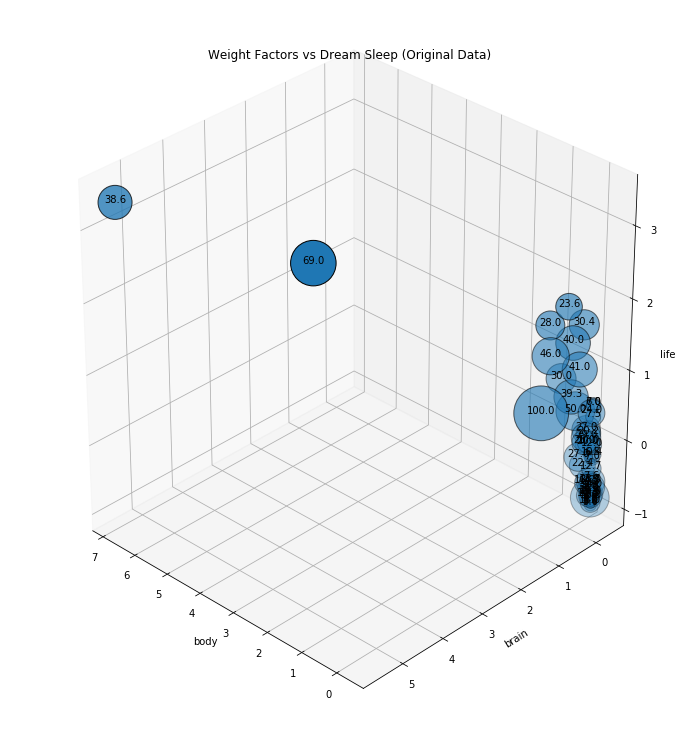

In [41]:
# dream sleep vs size
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'body', 'brain', 'gestation'])

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i].astype(np.float),
              horizontalalignment='center')
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], 
           s=filtered_species.astype(np.float)*30, edgecolor='k')

ax.set_title('Weight Factors vs Dream Sleep (Original Data)')
ax.set_xlabel('body')
ax.set_ylabel('brain')
ax.set_zlabel('life')

plt.show()

csv file size:  (55, 4)
3 Attributes: 
['body' 'brain' 'gestation']
55 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  28.   20.    3.9  39.3  41.   16.2   9.    7.6
  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5  23.6  12.
  20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.   17.   20.
  12.7   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (55, 3)

explained_variance_ratio:  [0.85422071 0.12735963]


C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


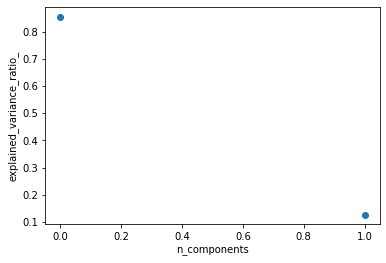

(2, 3)


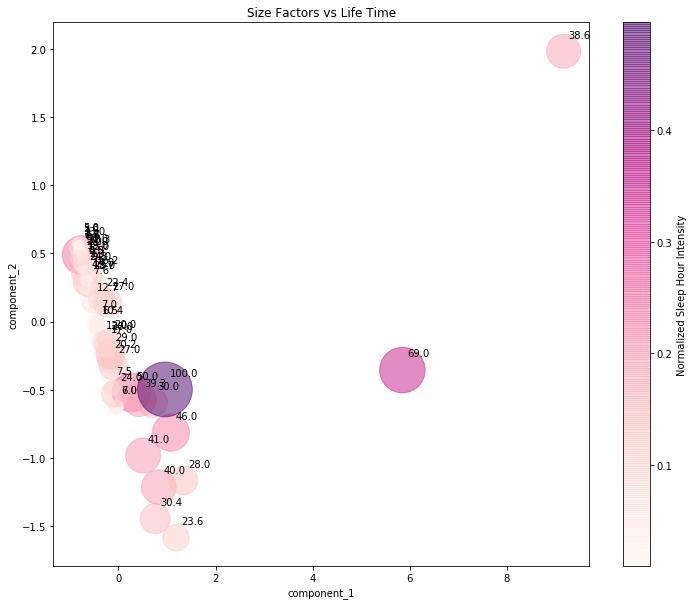

In [44]:

attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life',  'body', 'brain', 'gestation'])

X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(12,10))

total_w = filtered_species.astype(np.float)
color = total_w / np.linalg.norm(total_w)

plt.scatter(X_filter[:, 0], X_filter[:, 1], alpha=0.5,  s=filtered_species.astype(float)*30,  c=color, cmap='RdPu')
cbar = plt.colorbar()
cbar.set_label('Normalized Sleep Hour Intensity')

for i in range(len(filtered_species)):
    plt.annotate(filtered_species[i], (X_filter[i, 0]+0.1, X_filter[i, 1]+0.1))
    
plt.title('Size Factors vs Life Time')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()


comment: no obvious relation between life span and size factors

## 3. Sleep Factors vs Life

dimensions: ['slowWaveSleep', 'dreamSleep', 'sleep']
 
Annotation: 'life'

csv file size:  (45, 4)
3 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep']
45 Species: 
[  4.5  69.   27.   19.   30.4  28.   50.    7.   30.    3.5  50.    6.
  10.4  34.    7.   20.    3.9  41.    9.    7.6  46.    2.6  24.  100.
   3.2   2.    5.    6.5  12.   20.2  13.   27.   18.    4.7   9.8  29.
   7.    6.   20.    3.5   4.5   7.5   2.3  24.    3. ]
Data shape:  (45, 3)



C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


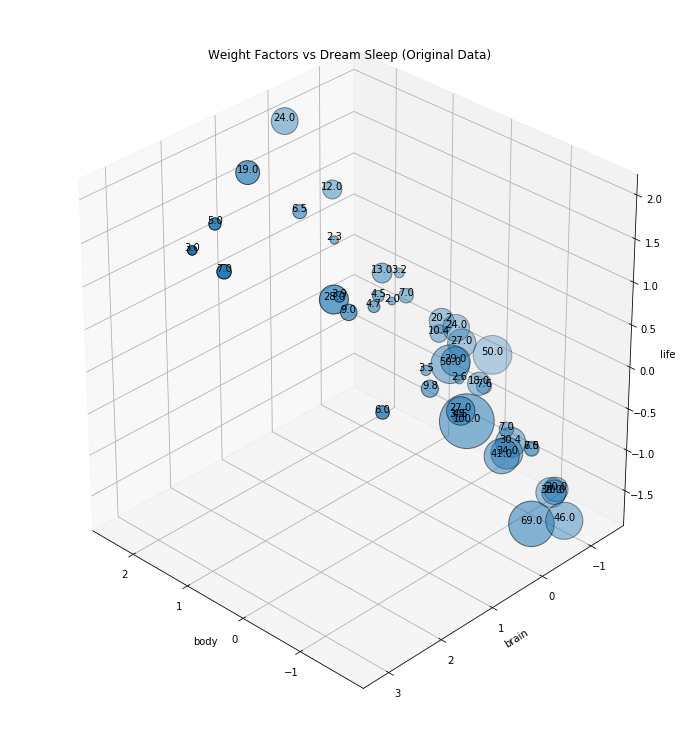

In [46]:
# dream sleep vs size
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr= ['life', 'slowWaveSleep', 'dreamSleep', 'sleep'])

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i].astype(np.float),
              horizontalalignment='center')
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], 
           s=filtered_species.astype(np.float)*30, edgecolor='k')

ax.set_title('Weight Factors vs Dream Sleep (Original Data)')
ax.set_xlabel('body')
ax.set_ylabel('brain')
ax.set_zlabel('life')

plt.show()

csv file size:  (45, 4)
3 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep']
45 Species: 
[  4.5  69.   27.   19.   30.4  28.   50.    7.   30.    3.5  50.    6.
  10.4  34.    7.   20.    3.9  41.    9.    7.6  46.    2.6  24.  100.
   3.2   2.    5.    6.5  12.   20.2  13.   27.   18.    4.7   9.8  29.
   7.    6.   20.    3.5   4.5   7.5   2.3  24.    3. ]
Data shape:  (45, 3)

explained_variance_ratio:  [0.83125356 0.16874644]


C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


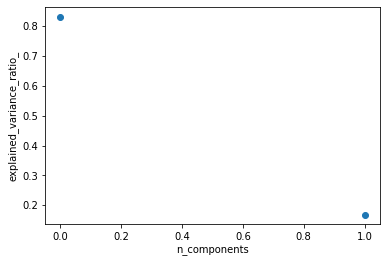

(2, 3)


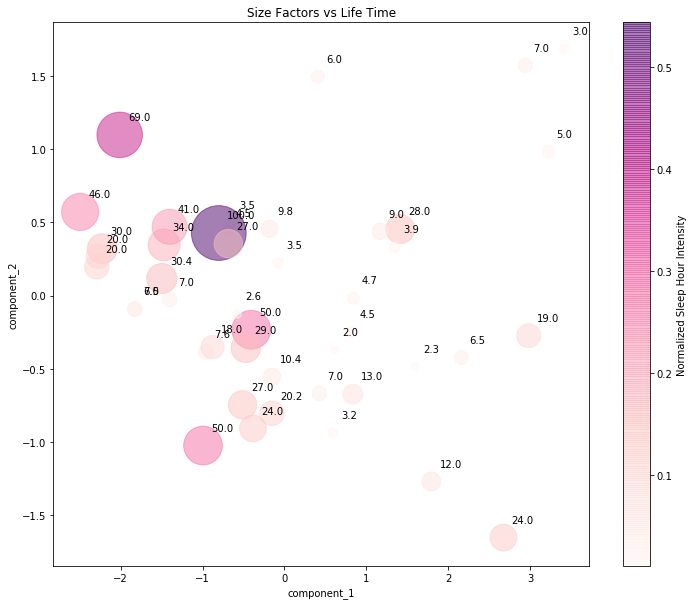

In [47]:

attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'slowWaveSleep', 'dreamSleep', 'sleep'])

X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(12,10))

total_w = filtered_species.astype(np.float)
color = total_w / np.linalg.norm(total_w)

plt.scatter(X_filter[:, 0], X_filter[:, 1], alpha=0.5,  s=filtered_species.astype(float)*30,  c=color, cmap='RdPu')
cbar = plt.colorbar()
cbar.set_label('Normalized Sleep Hour Intensity')

for i in range(len(filtered_species)):
    plt.annotate(filtered_species[i], (X_filter[i, 0]+0.1, X_filter[i, 1]+0.1))
    
plt.title('Size Factors vs Life Time')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()


comment: sleep factors to some extend relate to life span

## 4. All Factors vs Life

dimensions: ['slowWaveSleep', 'dreamSleep', 'sleep', 'body', 'brain', 'gestation', 'predation', 'sleepExposure', 'danger']
 
Annotation: 'life'

csv file size:  (42, 10)
9 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep' 'body' 'brain' 'gestation'
 'predation' 'sleepExposure' 'danger']
42 Species: 
[  4.5  69.   27.   19.   30.4  28.   50.    7.   30.    3.5  50.    6.
  10.4  20.    3.9  41.    9.    7.6  46.    2.6  24.  100.    3.2   2.
   5.    6.5  12.   20.2  13.   27.   18.    4.7   9.8  29.    7.    6.
  20.    4.5   7.5   2.3  24.    3. ]
Data shape:  (42, 9)

explained_variance_ratio:  [0.54043125 0.23200619]


C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


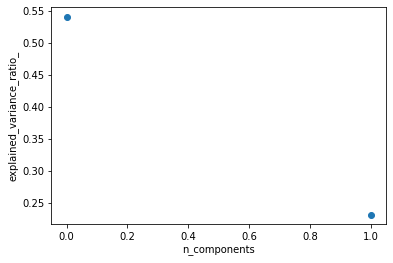

(2, 9)


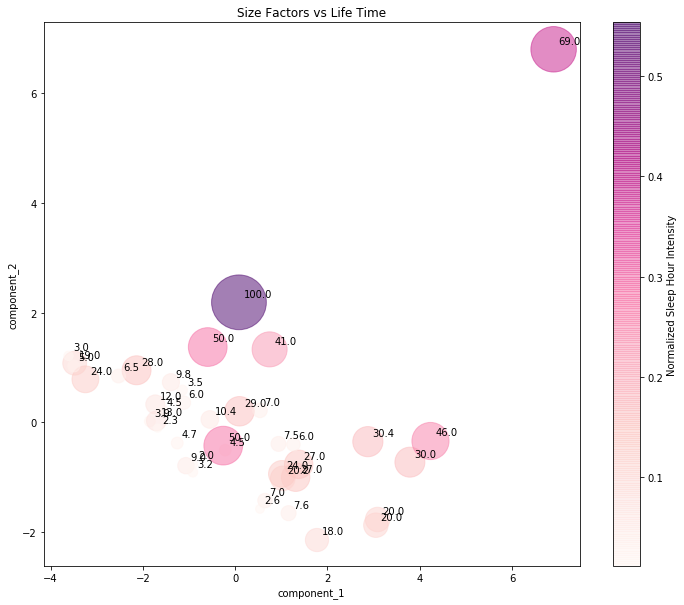

In [49]:

attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'slowWaveSleep', 'dreamSleep', 'sleep', 'body', 'brain', 'gestation', 'predation', 'sleepExposure', 'danger'])

X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(12,10))

total_w = filtered_species.astype(np.float)
color = total_w / np.linalg.norm(total_w)

plt.scatter(X_filter[:, 0], X_filter[:, 1], alpha=0.5,  s=filtered_species.astype(float)*30,  c=color, cmap='RdPu')
cbar = plt.colorbar()
cbar.set_label('Normalized Sleep Hour Intensity')

for i in range(len(filtered_species)):
    plt.annotate(filtered_species[i], (X_filter[i, 0]+0.1, X_filter[i, 1]+0.1))
    
plt.title('Size Factors vs Life Time')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()


comments: to some extend all factors relate to life span.

# Manifold

In [50]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [51]:
def _manifold(attrs, filtered_species, filtered_data, factor_desc="Danger Factors", label_desc="Life Span"):
    
    total_w = filtered_species.astype(np.float)
    color = total_w / np.linalg.norm(total_w)

    n_points = len(filtered_species)
    n_neighbors = 10
    n_components = 2

    fig = plt.figure(figsize=(18, 8))
    plt.suptitle("Manifold Learning with %i points, %i neighbors, %s vs %s"
                 % (n_points, n_neighbors, factor_desc, label_desc), fontsize=14)


    ax = fig.add_subplot(251, projection='3d')
    p = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=color, cmap='RdPu')
    ax.view_init(4, -72)
    cbar = plt.colorbar(p)
    cbar.set_label('Normalized Life Span Intensity')

    methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(filtered_data)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(filtered_data)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(filtered_data)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(258)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


    t0 = time()
    se = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)
    Y = se.fit_transform(filtered_data)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(259)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(filtered_data)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(2, 5, 10)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    # plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    # cbar = plt.colorbar()
    # cbar.set_label('Color Intensity')
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    plt.show()

## 1. Danger factors effect on life

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (58, 4)
3 Attributes: 
['predation' 'sleepExposure' 'danger']
58 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  34.    7.   28.   20.    3.9  39.3  41.   16.2
   9.    7.6  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5
  23.6  12.   20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.
  17.   20.   12.7   3.5   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (58, 3)

standard: 0.008 sec
ltsa: 0.011 sec
hessian: 0.016 sec
modified: 0.013 sec
Isomap: 0.014 sec
MDS: 0.006 sec
SpectralEmbedding: 0.005 sec
t-SNE: 0.19 sec


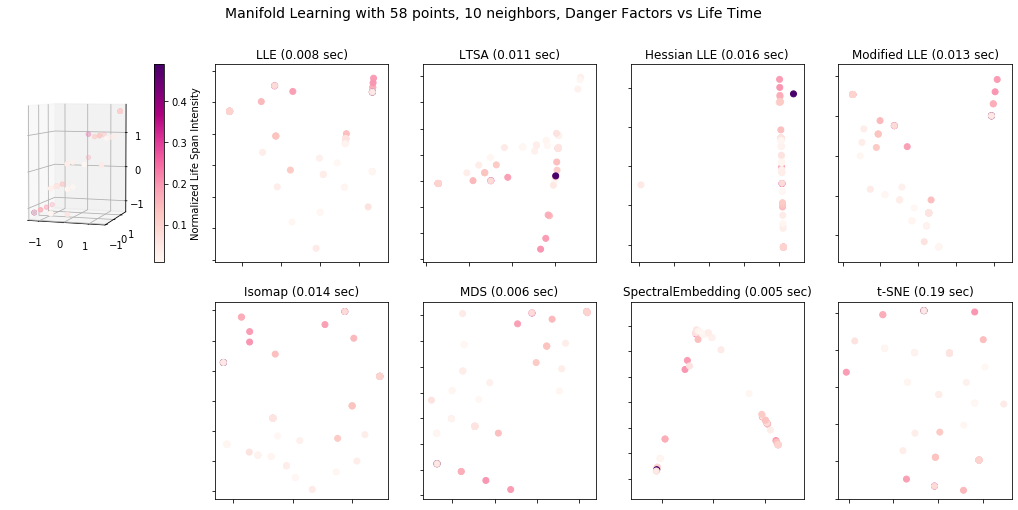

In [52]:
# Danger factors are correlated to dreamSleep in original paper
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'predation', 'sleepExposure', 'danger'])
_manifold(attrs, filtered_species, filtered_data, factor_desc="Danger Factors", label_desc="Life Time")

Comments: Danger factors ('predation', 'sleepExposure', 'danger') have no obvious relation to life span.

## 2. Size Factors vs Life

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (55, 4)
3 Attributes: 
['body' 'brain' 'gestation']
55 Species: 
[ 38.6   4.5  14.   69.   27.   19.   30.4  28.   50.    7.   30.   40.
   3.5  50.    6.   10.4  28.   20.    3.9  39.3  41.   16.2   9.    7.6
  46.   22.4  16.3   2.6  24.  100.    3.2   2.    5.    6.5  23.6  12.
  20.2  13.   27.   18.   13.7   4.7   9.8  29.    7.    6.   17.   20.
  12.7   4.5   7.5   2.3  24.    3.   13. ]
Data shape:  (55, 3)

standard: 0.0078 sec
ltsa: 0.0095 sec
hessian: 0.015 sec
modified: 0.012 sec
Isomap: 0.0057 sec
MDS: 0.014 sec
SpectralEmbedding: 0.005 sec
t-SNE: 0.21 sec


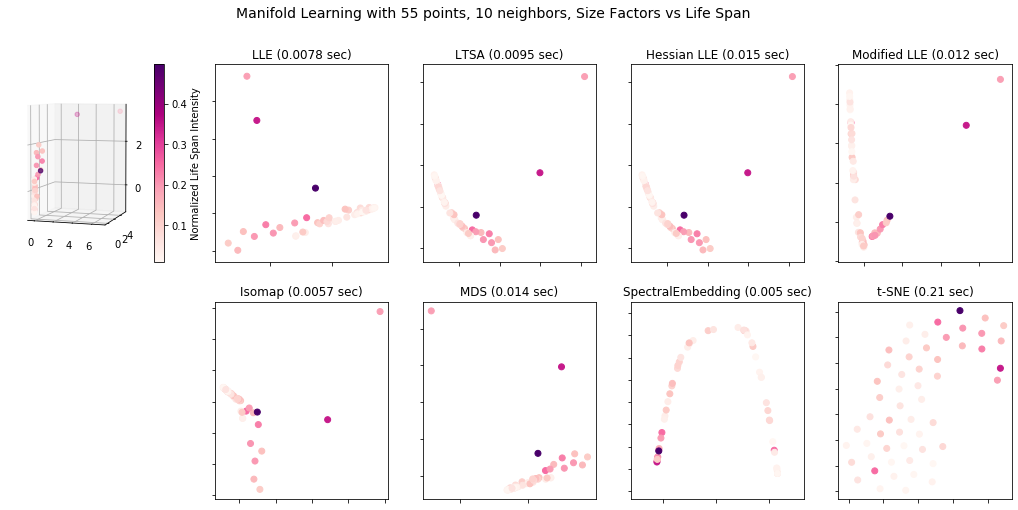

In [53]:
# dream sleep vs weight factors
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'body', 'brain', 'gestation'])
_manifold(attrs, filtered_species, filtered_data, factor_desc="Size Factors", label_desc="Life Span")

Comments: Size factors ('body', 'brain', 'gestation') have some relation to life span

## 3. Sleep factors effect on life

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (45, 4)
3 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep']
45 Species: 
[  4.5  69.   27.   19.   30.4  28.   50.    7.   30.    3.5  50.    6.
  10.4  34.    7.   20.    3.9  41.    9.    7.6  46.    2.6  24.  100.
   3.2   2.    5.    6.5  12.   20.2  13.   27.   18.    4.7   9.8  29.
   7.    6.   20.    3.5   4.5   7.5   2.3  24.    3. ]
Data shape:  (45, 3)

standard: 0.0073 sec
ltsa: 0.008 sec
hessian: 0.013 sec
modified: 0.01 sec
Isomap: 0.003 sec
MDS: 0.007 sec
SpectralEmbedding: 0.004 sec
t-SNE: 0.17 sec


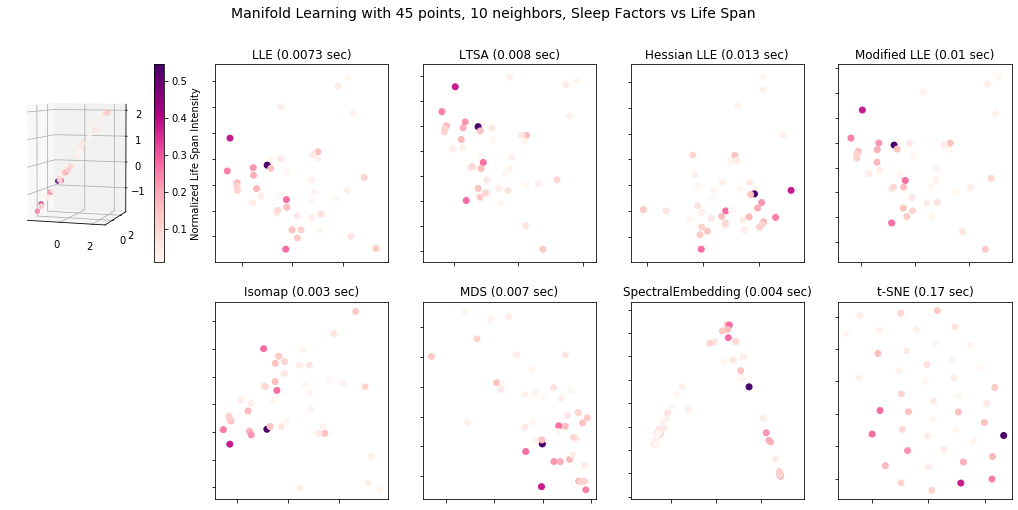

In [54]:
# dream sleep vs weight factors
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life', 'slowWaveSleep', 'dreamSleep', 'sleep'])
_manifold(attrs, filtered_species, filtered_data, factor_desc="Sleep Factors", label_desc="Life Span")

Comments: Sleep factors ('slowWaveSleep', 'dreamSleep', 'sleep') have some relation to life span

## 4. All factors effect on life

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (42, 10)
9 Attributes: 
['slowWaveSleep' 'dreamSleep' 'sleep' 'body' 'brain' 'gestation'
 'predation' 'sleepExposure' 'danger']
42 Species: 
[  4.5  69.   27.   19.   30.4  28.   50.    7.   30.    3.5  50.    6.
  10.4  20.    3.9  41.    9.    7.6  46.    2.6  24.  100.    3.2   2.
   5.    6.5  12.   20.2  13.   27.   18.    4.7   9.8  29.    7.    6.
  20.    4.5   7.5   2.3  24.    3. ]
Data shape:  (42, 9)

standard: 0.0062 sec
ltsa: 0.008 sec
hessian: 0.012 sec
modified: 0.0099 sec
Isomap: 0.002 sec
MDS: 0.012 sec
SpectralEmbedding: 0.005 sec
t-SNE: 0.17 sec


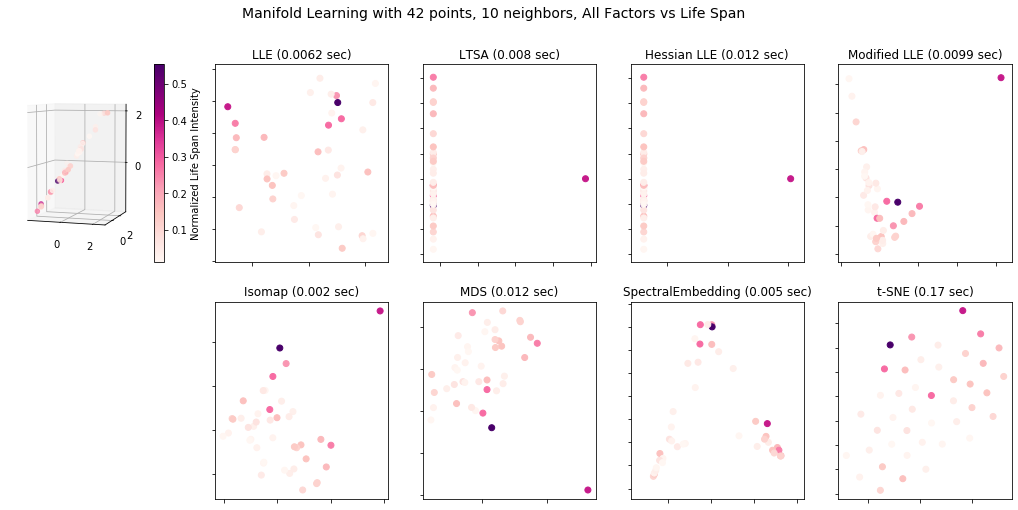

In [55]:
# all factors vs sleep 
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['life','slowWaveSleep', 'dreamSleep', 'sleep', 'body', 'brain', 'gestation', 'predation', 'sleepExposure', 'danger'])
_manifold(attrs, filtered_species, filtered_data, factor_desc="All Factors", label_desc="Life Span")

Comments: All factors ('slowWaveSleep', 'dreamSleep', 'sleep', 'body', 'brain', 'gestation', 'predation', 'sleepExposure', 'danger') have relation to life span.